# <center>Стохастический градиентный спуск (SGD)</center>

In [10]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn import linear_model
warnings.filterwarnings('ignore')
boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']

In [8]:
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
sgd_lr_lstat.fit(X, y)
print('w0:', sgd_lr_lstat.intercept_)
print('w1:', sgd_lr_lstat.coef_)

w0: [34.33010969]
w1: [-0.96193242]


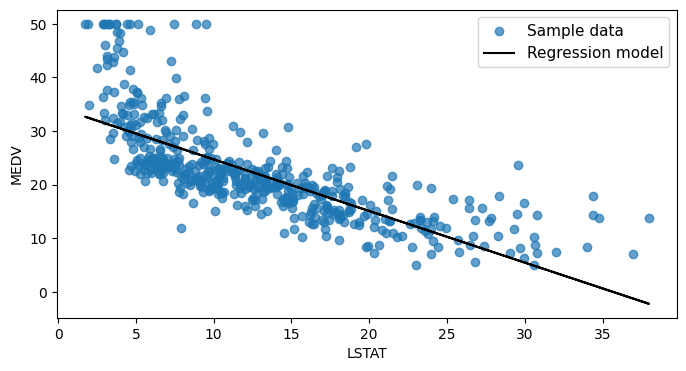

In [9]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [12]:
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


У аналитического метода $R^2 = 0.544$

Обучим на всех признаках.

In [14]:
X = boston_data.drop(columns='MEDV')
y = boston_data['MEDV']

sgd_lr_full = linear_model.SGDRegressor(random_state=42)
sgd_lr_full.fit(X, y)

w_df = pd.DataFrame({
    'Features': X.columns,
    'Coeffs': sgd_lr_full.coef_
})
intercept_df = pd.DataFrame({
    'Features': 'INTERCEPT',
    'Coeffs': sgd_lr_full.intercept_
})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
coef_df

,Features,Coeffs
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


Все коэффициенты имеют запредельные значения (9-11 степени числа 10). Это типичная картина расходящегося градиентного спуска: алгоритм не достиг точки минимума по каким-то причинам. Такие высокие значения коэффициентов означают, что модель является неустойчивой.

In [15]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129977211224064.000


In [16]:
from sklearn import preprocessing

In [23]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [25]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': X.columns, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [27]:
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


>Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

Параметры `SGDRegressor`:
* `loss` - функция потерь. По умолчанию используется squared_loss — уже привычная нам MSE. Но могут использоваться и несколько других. Например, значение "huber" определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.
* `max_iter` - максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.
* `learning_rate` - режим управления темпом обучения. Значение по умолчанию — `invscaling`. Этот режим уменьшает темп обучения по формуле, которую мы рассматривали ранее: $\eta_t = \frac{\eta_0}{t^p}$.
Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на `constant`.
* `eta0` — начальное значение темпа обучения $\eta_0$. Значение по умолчанию — 0.01.
Если параметр `learning_rate="constant"`, то значение этого параметра будет темпом обучения на протяжении всех итераций.
* `power_t` — значение мощности уменьшения $p$ в формуле $\eta_t = \frac{\eta_0}{t^p}$. Значение по умолчанию — 0.25.

Что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:

In [28]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.569


Вот ещё один плохой пример. Что будет, если поставить слишком маленькое значение параметра eta0? Например, 0.000001.

In [29]:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad2 = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=1e-6, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad2.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad2.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
 
# R2 score: -1.578
# warnings.warn("Maximum number of iteration reached before ")

R2 score: -1.578


SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.

In [30]:
# 4.9
sgd_lr_tol = linear_model.SGDRegressor(
    random_state=42,
    tol=0.1
)
sgd_lr_tol.fit(X_scaled, y)
y_predict = sgd_lr_tol.predict(X_scaled)

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


> Повторный вызов `fit()` уточняет уже существующие параметры модели, есть возможность дообучить модель на новых данных в режиме реального времени(инкрементальное обучение). Аналитическое решение не имеет такой возможности

Примерные области применения каждого из методов:

* Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — `LinearRegression`, так как МНК обеспечивает простое решение и гарантированную сходимость.

* Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — `SGDRegressor` с возможностью корректировки параметров на новых данных.
